# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.402059e+01     1.505813e+01
 * time: 0.0038290023803710938
     1     6.445147e+01     8.305761e+00
 * time: 0.010841846466064453
     2     5.886684e+01     1.200911e+01
 * time: 0.026167869567871094
     3     4.387742e+01     8.692861e+00
 * time: 0.04679083824157715
     4     3.554540e+01     8.803703e+00
 * time: 0.12376093864440918
     5     1.549535e+01     2.506781e+00
 * time: 0.1451117992401123
     6     1.163881e+01     2.693720e+00
 * time: 0.1599578857421875
     7     1.008014e+01     2.496073e+00
 * time: 0.17436695098876953
     8     8.475966e+00     2.719863e+00
 * time: 0.18880796432495117
     9     7.495537e+00     2.343725e+00
 * time: 0.20322299003601074
    10     6.708624e+00     1.722308e+00
 * time: 0.25835180282592773
    11     6.197974e+00     1.191348e+00
 * time: 0.2735409736633301
    12     5.856313e+00     1.370323e+00
 * time: 0.28580188751220703
    13     5.563900e+00     1.387233e+00
 * time

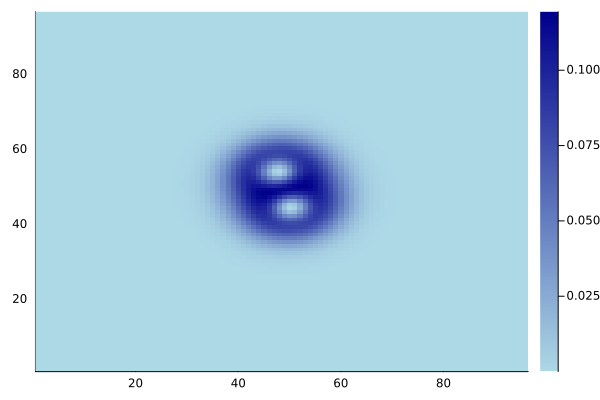

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)